# Density

## Create mega dataframe with all the clean density values and save as csv

In [33]:
#05/11/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

# mega_df
pressure =[]
temperature = []
density =[]

pressure_error =[]
temperature_error = []
density_error = []

paper =[]

#create mega dataframe
for key in all_papers.keys():
    path = all_papers[key][2]
    data = pd.read_excel(path)

    pressure += list(data["P_SI"])
    temperature += list(data["T_SI"])
    density += list(data["rho_SI"])

    pressure_error += list(data["delta_P"])
    temperature_error += list(data["delta_T"])
    density_error += list(data["delta_rho"])

    paper += [key]*(data.index[-1]+1)

df = pd.DataFrame(data = {"paper": paper,
                          "P": pressure,
                          "T": temperature,
                          "rho": density,
                          "delta_P": pressure_error,
                          "delta_T": temperature_error,
                          "delta_rho": density_error}
)


# save dataframe
df.to_csv("dataframes/experimental_data_density/density.csv")



## Scatter plot of data per paper

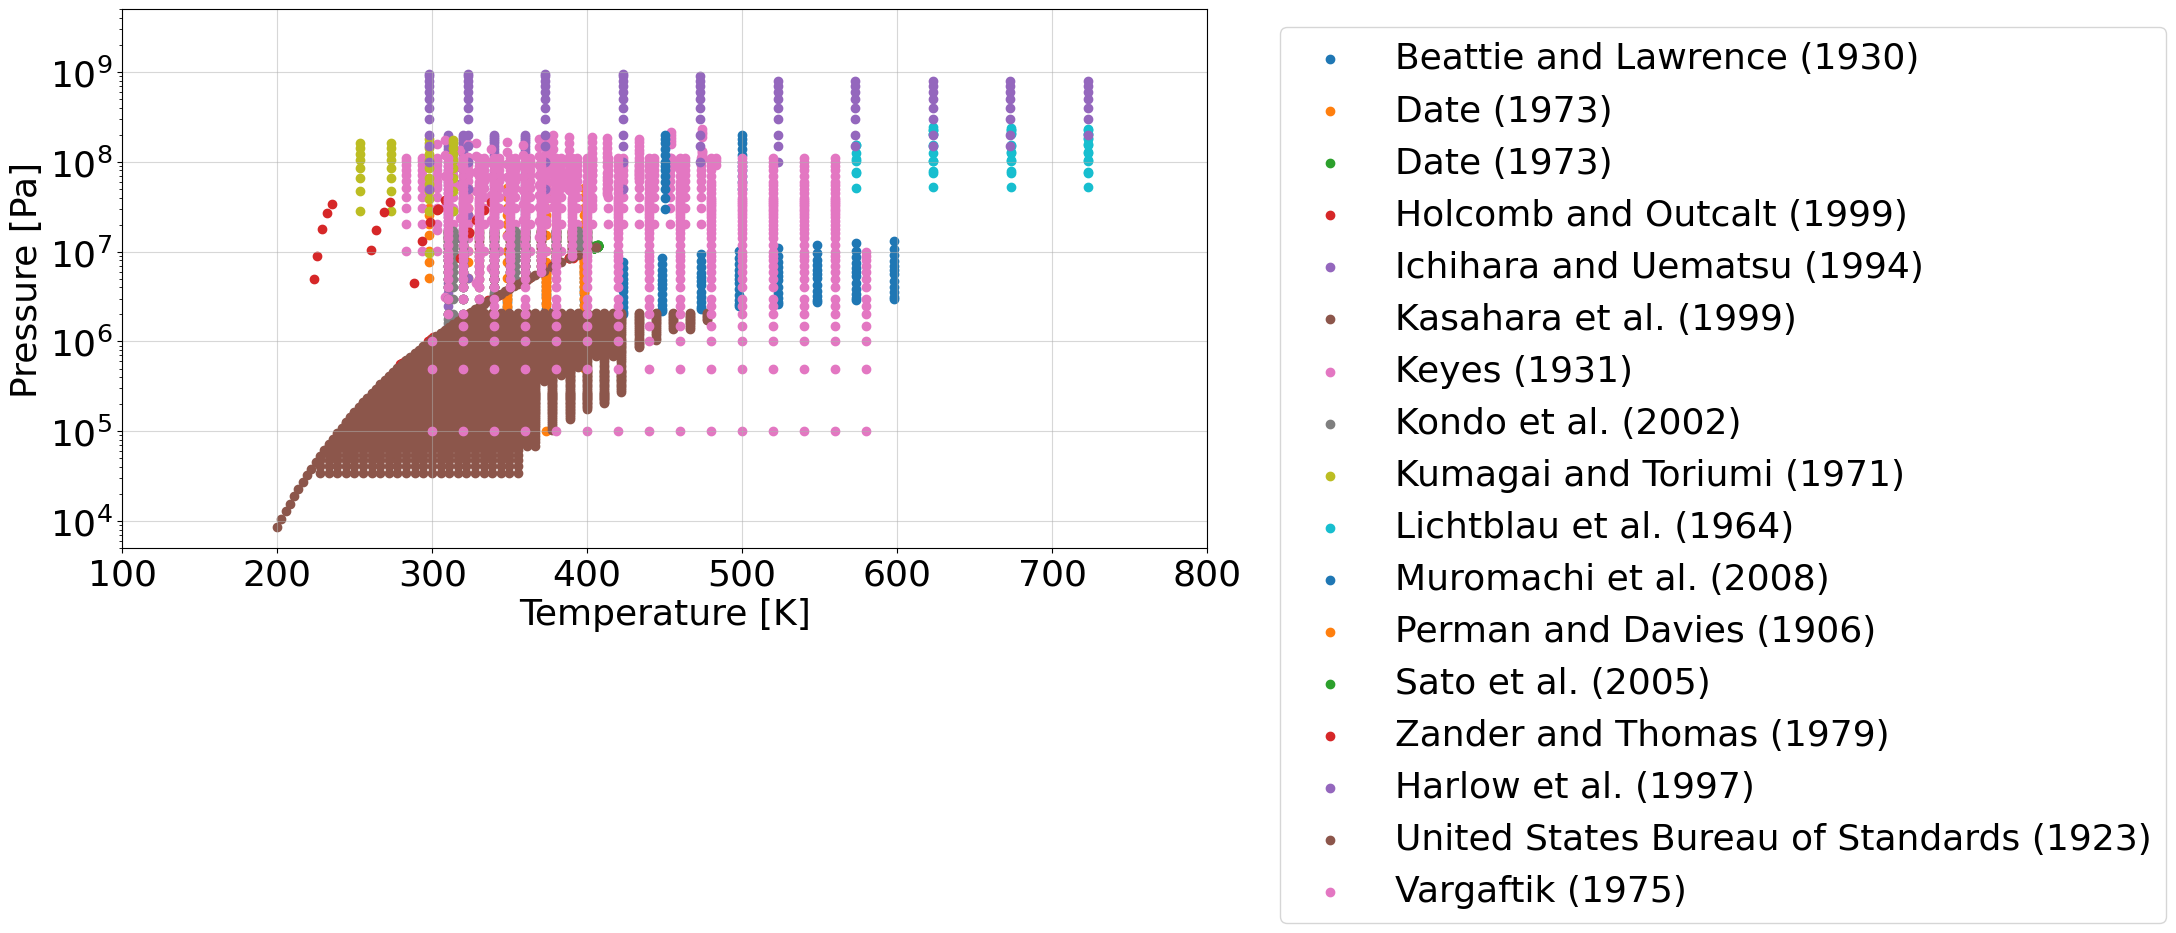

In [46]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

data = pd.read_csv("dataframes/experimental_data_density/density.csv")

fig, ax = plt.subplots()

for paper in df["paper"].unique():
    data = df[df["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    
